<a href="https://colab.research.google.com/github/ahatesham02/Bangla-Image-Captioning/blob/main/Image_Captioning_Bornon_Dataset_with_Bahdanau_attention_with_BiGRU_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import string
import keras
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras.backend import set_session
import sys, time, os, warnings 
warnings.filterwarnings("ignore")
import re

import numpy as np
import pandas as pd 
from PIL import Image
import pickle
from collections import Counter
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, BatchNormalization
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import add
from keras.callbacks import ModelCheckpoint
from keras.utils import load_img, img_to_array
from sklearn.utils import shuffle
from keras.applications.vgg16 import VGG16, preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text


In [3]:
import zipfile
exfile= '/content/drive/MyDrive/Thesis/Bornon/Bornon Images-20221222T175856Z-001.zip'
zip_ref = zipfile.ZipFile(exfile, 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
from os import listdir
## The location of the Flickr8K_ photos
image_dir = '/content/Bornon Images'
images = listdir(image_dir)

## The location of the caption file
descriptions_dir = '/content/drive/MyDrive/Thesis/Bornon/bornon_train_token.txt'
print("The number of jpg flies in Bornon: {}".format(len(images)))

The number of jpg flies in Bornon: 4106


In [ ]:
text = load_doc(descriptions_dir)
print(text[:387])


1.jpg#0    একটি পার্কে একটি লেক আছে ।
1.jpg#0    লেকের উপর একটি ব্রীজ আছে ।
1.jpg#0    গাছপালায় ঘেরা এই পার্কটি খুবই মনমুগ্ধকর ।
1.jpg#0    লেকের উপর একটি ব্রীজ আছে ।
1.jpg#0    পানির উপর আকাশের প্রতিচ্ছবি দেখা যাচ্ছে ।
2.jpg#0    একজন মানুষ মাথায় খড় নিয়ে হেটে যাচ্ছে ।
2.jpg#0    একজন মানুষ ও দু'টি খড়ের স্তূপ দেখা যাচ্ছে ।
2.jpg#0    লুঙ্গি পড়া একজন মানুষ খড়ের উপর হেটে যাচ্ছে ।


In [ ]:
name = []
caption =[]
for sentences in text.split('\n'):
    splitted = sentences.split('#')
    w = splitted[0]
    name.append(w)
    cap = splitted[1].split(' ', 1)[1]
    caption.append(cap)

In [ ]:
name

['1.jpg',
 '1.jpg',
 '1.jpg',
 '1.jpg',
 '1.jpg',
 '2.jpg',
 '2.jpg',
 '2.jpg',
 '2.jpg',
 '2.jpg',
 '3.jpg',
 '3.jpg',
 '3.jpg',
 '3.jpg',
 '3.jpg',
 '4.jpg',
 '4.jpg',
 '4.jpg',
 '4.jpg',
 '4.jpg',
 '5.jpg',
 '5.jpg',
 '5.jpg',
 '5.jpg',
 '5.jpg',
 '6.jpg',
 '6.jpg',
 '6.jpg',
 '6.jpg',
 '6.jpg',
 '7.jpg',
 '7.jpg',
 '7.jpg',
 '7.jpg',
 '7.jpg',
 '8.jpg',
 '8.jpg',
 '8.jpg',
 '8.jpg',
 '8.jpg',
 '9.jpg',
 '9.jpg',
 '9.jpg',
 '9.jpg',
 '9.jpg',
 '10.jpg',
 '10.jpg',
 '10.jpg',
 '10.jpg',
 '10.jpg',
 '12.jpg',
 '12.jpg',
 '12.jpg',
 '12.jpg',
 '12.jpg',
 '13.jpg',
 '13.jpg',
 '13.jpg',
 '13.jpg',
 '13.jpg',
 '14.jpg',
 '14.jpg',
 '14.jpg',
 '14.jpg',
 '14.jpg',
 '15.jpg',
 '15.jpg',
 '15.jpg',
 '15.jpg',
 '15.jpg',
 '16.jpg',
 '16.jpg',
 '16.jpg',
 '16.jpg',
 '16.jpg',
 '17.jpg',
 '17.jpg',
 '17.jpg',
 '17.jpg',
 '17.jpg',
 '18.jpg',
 '18.jpg',
 '18.jpg',
 '18.jpg',
 '18.jpg',
 '19.jpg',
 '19.jpg',
 '19.jpg',
 '19.jpg',
 '19.jpg',
 '21.jpg',
 '21.jpg',
 '21.jpg',
 '21.jpg',
 '21.jpg',


In [ ]:
len(name)

17439

In [ ]:
len(caption)

17439

In [ ]:
hr_lst  = list (zip(name, caption))
hr_lst

[('1.jpg', '   একটি পার্কে একটি লেক আছে ।'),
 ('1.jpg', '   লেকের উপর একটি ব্রীজ আছে ।'),
 ('1.jpg', '   গাছপালায় ঘেরা এই পার্কটি খুবই মনমুগ্ধকর ।'),
 ('1.jpg', '   লেকের উপর একটি ব্রীজ আছে ।'),
 ('1.jpg', '   পানির উপর আকাশের প্রতিচ্ছবি দেখা যাচ্ছে ।'),
 ('2.jpg', '   একজন মানুষ মাথায় খড় নিয়ে হেটে যাচ্ছে ।'),
 ('2.jpg', "   একজন মানুষ ও দু'টি খড়ের স্তূপ দেখা যাচ্ছে ।"),
 ('2.jpg', '   লুঙ্গি পড়া একজন মানুষ খড়ের উপর হেটে যাচ্ছে ।'),
 ('2.jpg', '   দুটি খড়ের স্তূপের পেছনে অনেক গাছপালা আছে ।'),
 ('2.jpg', '   অনেক গাছপালার সামনে দুটি খড়ের স্তূপ আছে ।'),
 ('3.jpg', '   টেবিলের উপর একটি চশমা আছে ।'),
 ('3.jpg', '   টেবিলের উপর একটি পানির গ্লাস ও একটি চশমা আছে ।'),
 ('3.jpg', '   একটি রুমে একটি খাট ও দুটি জানালা আছে  আছে ।'),
 ('3.jpg',
  '   টেবিলের উপর একটি গ্লাস ঢাকনা দিয়ে ঢেকে রাখা আছে এবং পাশে একটি চশমা আছে ।'),
 ('3.jpg',
  '   একটি রুমে একটি খাট এবং একটি টেবিল আছে,টেবিলের উপর পানির গ্লাস ও চশমা আছে ।'),
 ('4.jpg', '   একটি শিশু দেখা যাচ্ছে ।'),
 ('4.jpg', '   একটি শিশু গ্রা

In [ ]:
data = pd.DataFrame(hr_lst, columns = ['filename', 'caption'])

data.head(15)

,filename,caption
0,1.jpg,একটি পার্কে একটি লেক আছে ।
1,1.jpg,লেকের উপর একটি ব্রীজ আছে ।
2,1.jpg,গাছপালায় ঘেরা এই পার্কটি খুবই মনমুগ্ধকর ।
3,1.jpg,লেকের উপর একটি ব্রীজ আছে ।
4,1.jpg,পানির উপর আকাশের প্রতিচ্ছবি দেখা যাচ্ছে ।
5,2.jpg,একজন মানুষ মাথায় খড় নিয়ে হেটে যাচ্ছে ।
6,2.jpg,একজন মানুষ ও দু'টি খড়ের স্তূপ দেখা যাচ্ছে ।
7,2.jpg,লুঙ্গি পড়া একজন মানুষ খড়ের উপর হেটে যাচ্ছে ।
8,2.jpg,দুটি খড়ের স্তূপের পেছনে অনেক গাছপালা আছে ।
9,2.jpg,অনেক গাছপালার সামনে দুটি খড়ের স্তূপ আছে ।


In [ ]:
data.shape

(17439, 2)

In [ ]:
def create_vocabulary(data):
  vocab = []
  for captions in data.caption.values:
    vocab.extend(captions.split())
  print("Vocabulary Size : {}".format(len(set(vocab))))
  return vocab

In [ ]:
vocabulary = create_vocabulary(data)

Vocabulary Size : 5418


In [ ]:
! pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.6 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import bnlp
from bnlp.corpus import  punctuations, letters, digits

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
table = str.maketrans('', '', punctuations)
desc = [w.translate(table) for w in data.caption]

In [ ]:
def cleaning(row):
  text = re.sub('[^\u0980-\u09FF]',' ', row) 
  return text

In [ ]:
data['caption'] = data.caption.apply(cleaning) 

In [ ]:
data.head(10)

,filename,caption
0,1.jpg,একটি পার্কে একটি লেক আছে
1,1.jpg,লেকের উপর একটি ব্রীজ আছে
2,1.jpg,গাছপালায় ঘেরা এই পার্কটি খুবই মনমুগ্ধকর
3,1.jpg,লেকের উপর একটি ব্রীজ আছে
4,1.jpg,পানির উপর আকাশের প্রতিচ্ছবি দেখা যাচ্ছে
5,2.jpg,একজন মানুষ মাথায় খড় নিয়ে হেটে যাচ্ছে
6,2.jpg,একজন মানুষ ও দু টি খড়ের স্তূপ দেখা যাচ্ছে
7,2.jpg,লুঙ্গি পড়া একজন মানুষ খড়ের উপর হেটে যাচ্ছে
8,2.jpg,দুটি খড়ের স্তূপের পেছনে অনেক গাছপালা আছে
9,2.jpg,অনেক গাছপালার সামনে দুটি খড়ের স্তূপ আছে


In [ ]:
clean_vocabulary = create_vocabulary(data)

Vocabulary Size : 5281


In [ ]:
def preprocess_images(data):
  img_name_vector = []

  for filenames in data["filename"]:
      full_image_path = image_dir+"/"+ filenames
      img_name_vector.append(full_image_path)
  return img_name_vector
img_name_vector = preprocess_images(data)
img_name_vector[:10]

['/content/Bornon Images/1.jpg',
 '/content/Bornon Images/1.jpg',
 '/content/Bornon Images/1.jpg',
 '/content/Bornon Images/1.jpg',
 '/content/Bornon Images/1.jpg',
 '/content/Bornon Images/2.jpg',
 '/content/Bornon Images/2.jpg',
 '/content/Bornon Images/2.jpg',
 '/content/Bornon Images/2.jpg',
 '/content/Bornon Images/2.jpg']

In [ ]:
def preprocess_captions(data):
  total_captions = []

  for caption  in data["caption"].astype(str):
      caption = '<start> ' + caption+ ' <end>'
      total_captions.append(caption)
  return total_captions
total_captions = preprocess_captions(data)
total_captions[:10]

['<start>    একটি পার্কে একটি লেক আছে   <end>',
 '<start>    লেকের উপর একটি ব্রীজ আছে   <end>',
 '<start>    গাছপালায় ঘেরা এই পার্কটি খুবই মনমুগ্ধকর   <end>',
 '<start>    লেকের উপর একটি ব্রীজ আছে   <end>',
 '<start>    পানির উপর আকাশের প্রতিচ্ছবি দেখা যাচ্ছে   <end>',
 '<start>    একজন মানুষ মাথায় খড় নিয়ে হেটে যাচ্ছে   <end>',
 '<start>    একজন মানুষ ও দু টি খড়ের স্তূপ দেখা যাচ্ছে   <end>',
 '<start>    লুঙ্গি পড়া একজন মানুষ খড়ের উপর হেটে যাচ্ছে   <end>',
 '<start>    দুটি খড়ের স্তূপের পেছনে অনেক গাছপালা আছে   <end>',
 '<start>    অনেক গাছপালার সামনে দুটি খড়ের স্তূপ আছে   <end>']

In [ ]:
print("Total Images : " + str(len(img_name_vector)))
print("Total Captions : " + str(len(total_captions)))

Total Images : 17439
Total Captions : 17439


In [ ]:
from pickle import dump

# save to file
dump(total_captions, open('bornon_captions.pkl', 'wb'))
dump(img_name_vector, open('bornon_img_names.pkl', 'wb'))

In [5]:
train_captions = load(open('/content/drive/MyDrive/Thesis/Bornon/Models/bornon_captions.pkl', 'rb'))
img_name_vector = load(open('/content/drive/MyDrive/Thesis/Bornon/Models/bornon_img_names.pkl', 'rb'))

In [6]:
# To know the shape of images
def img_shape_finder(image):
  img= plt.imread(image)

  print("Shape of the image ==> {0} is ==> {1}".format(image.split('/')[1],img.shape))

In [7]:
img_list=[]
for i in range(20):
  img_list.append(img_name_vector[i])

In [8]:
for j in img_list:
  img_shape_finder(j)

Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the image ==> content is ==> (400, 400, 3)
Shape of the

In [9]:
import tensorflow as tf

###Image Reshaping 

In [10]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [12]:
# creating list to store preprocessed images and setting up the Image Shape

preprocessed_image = []
IMAGE_SHAPE = (224, 224)

In [13]:
for img in img_name_vector[0:5] :
    img = tf.io.read_file(img, name=None)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (224, 224))
    img = tf.keras.applications.resnet50.preprocess_input(img)
    preprocessed_image.append(img)

Shape after resize :  (224, 224, 3)
Shape after resize :  (224, 224, 3)
Shape after resize :  (224, 224, 3)
Shape after resize :  (224, 224, 3)
Shape after resize :  (224, 224, 3)


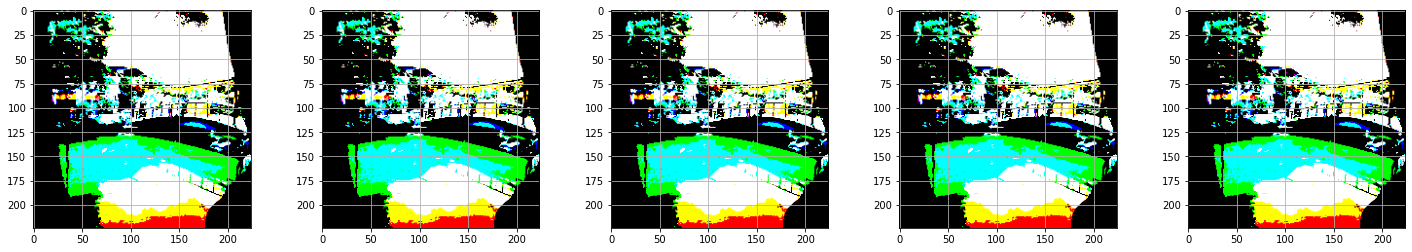

In [14]:
# checking first five images post preprocessing
Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)
for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')

Shape after resize : (224, 224, 3)


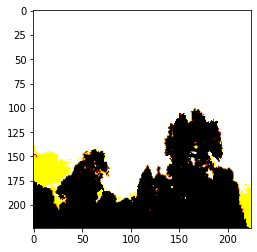

In [15]:
def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.resnet50.preprocess_input(img)
  return img, image_path

img1,img1_path = load_images("/content/Bornon Images/1003.jpg")
print("Shape after resize :", img1.shape)
plt.imshow(img1)

## Load Pretrained Model

In [16]:
image_model = tf.keras.applications.ResNet50(include_top=False,weights='imagenet')
new_input = image_model.input 
hidden_layer = image_model.layers[-1].output  
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)

94765736/94765736 [==============================] - 5s 0us/step


In [17]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

## Tokenizer and Vocabulary

In [18]:
def tokenize_caption(top_k,train_captions):
  # Choose the top 5000 words from the vocabulary
  tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,oov_token="<unk>",filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
  # oov_token: if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls
  
  tokenizer.fit_on_texts(train_captions)
  train_seqs = tokenizer.texts_to_sequences(train_captions)

  # Map '<pad>' to '0'
  tokenizer.word_index['<pad>'] = 0
  tokenizer.index_word[0] = '<pad>'


  # Create the tokenized vectors
  train_seqs = tokenizer.texts_to_sequences(train_captions)
  return train_seqs, tokenizer

train_seqs , tokenizer = tokenize_caption(5000,train_captions)

In [19]:
vocab_size = len(tokenizer.index_word)+1

In [20]:
vocab_size

5791

In [21]:
train_captions[:3]

['<start>    একটি পার্কে একটি লেক আছে   <end>',
 '<start>    লেকের উপর একটি ব্রীজ আছে   <end>',
 '<start>    গাছপালায় ঘেরা এই পার্কটি খুবই মনমুগ্ধকর   <end>']

In [22]:
train_seqs[:3]

[[2, 4, 289, 4, 608, 5, 3],
 [2, 392, 17, 4, 609, 5, 3],
 [2, 2670, 447, 972, 3584, 1537, 3585, 3]]

In [23]:
tokenizer.index_word

{1: '<unk>',
 2: '<start>',
 3: '<end>',
 4: 'একটি',
 5: 'আছে',
 6: 'যাচ্ছে',
 7: 'দেখা',
 8: 'কিছু',
 9: 'একজন',
 10: 'মানুষ',
 11: 'রয়েছে',
 12: 'ছবি',
 13: 'সাদা',
 14: 'বসে',
 15: 'ও',
 16: 'খাবার',
 17: 'উপর',
 18: 'অনেক',
 19: 'এবং',
 20: 'গাছ',
 21: 'ফুল',
 22: 'বাটিতে',
 23: 'দুটি',
 24: 'রঙের',
 25: 'সবুজ',
 26: 'পাশে',
 27: 'এর',
 28: 'কুকুর',
 29: 'গাছপালা',
 30: 'রাখা',
 31: 'লাল',
 32: 'কালো',
 33: 'লোক',
 34: 'পাখি',
 35: 'নৌকা',
 36: 'অনেকগুলো',
 37: 'পাতা',
 38: 'আকাশ',
 39: 'গাছের',
 40: 'নীল',
 41: 'আকাশে',
 42: 'প্লেটে',
 43: 'দাঁড়িয়ে',
 44: 'দালান',
 45: 'দারিয়ে',
 46: 'বিড়াল',
 47: 'সামনে',
 48: 'দৃশ্যমান',
 49: 'বাটি',
 50: 'দুইটি',
 51: 'মধ্যে',
 52: 'নদীর',
 53: 'রাস্তার',
 54: 'উপরে',
 55: 'ছেলে',
 56: 'দিয়ে',
 57: 'কয়েকটি',
 58: 'প্লেট',
 59: 'রয়েছে',
 60: 'রাস্তায়',
 61: 'প্লেটের',
 62: 'রাস্তা',
 63: 'করা',
 64: 'হলুদ',
 65: 'ওপর',
 66: 'করছে',
 67: 'নিচে',
 68: 'ছোট',
 69: 'শিশু',
 70: 'তিনটি',
 71: 'মেঘ',
 72: 'দালানের',
 73: 'টেবিলের',
 74: 'দূরে',
 75: 

In [24]:
# Pad each vector to the max_length of the captions  store it to a vairable

train_seqs_len = [len(seq) for seq in train_seqs]

longest_word_length = max(train_seqs_len)

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(20439, 23)


In [25]:
cap_vector

array([[   2,    4,  289, ...,    0,    0,    0],
       [   2,  392,   17, ...,    0,    0,    0],
       [   2, 2670,  447, ...,    0,    0,    0],
       ...,
       [   2,   50,  435, ...,    0,    0,    0],
       [   2,    4, 2669, ...,    0,    0,    0],
       [   2,   73,   17, ...,    0,    0,    0]], dtype=int32)

## Creating Dataset

In [26]:
# Map each image full path to the function, in order to preprocess the image
training_list = sorted(set(img_name_vector))
New_Img = tf.data.Dataset.from_tensor_slices(training_list)
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
New_Img = New_Img.batch(64, drop_remainder=False)

In [27]:
path_train, path_test, caption_train, caption_test = train_test_split(img_name_vector, cap_vector, test_size = 0.2, random_state = 42)

In [28]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 16351
Testing data for images: 4088
Training data for Captions: 16351
Testing data for Captions: 4088


In [29]:
from tqdm import tqdm

In [30]:
New_Img

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [31]:
# extract features from each image in the dataset
img_features = {}
for image, image_path in tqdm(New_Img) :
  batch_features = image_features_extract_model(image)
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 64/64 [00:41<00:00,  1.56it/s]


In [32]:
batch_features

<tf.Tensor: shape=(56, 7, 7, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.54156208e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.90650702e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [33]:
batch_features_flattened

<tf.Tensor: shape=(56, 49, 2048), dtype=float32, numpy=
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 3.1911840e+00, 0.0000000e+00, ...,
         0.0000000e+00, 2.5830531e-01, 0.0000000e+00],
        [0.0000000e+00, 3.2578003e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 7.6247530e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.000000

In [34]:
batch_feat.shape

TensorShape([49, 2048])

In [35]:
img_features 

{'/content/Bornon Images/1.jpg': array([[0.       , 6.8308415, 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 5.668071 , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 4.2779813, 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.5705111, 0.       ,
         0.       ]], dtype=float32),
 '/content/Bornon Images/10.jpg': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [1.3949015 , 0.56290257, 0.        , ..., 8.5627    , 1.

In [36]:
#to provide, both images along with the captions as input
def map(image_name, caption):
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [37]:
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier
BUFFER_SIZE = 1000
BATCH_SIZE = 64
def gen_dataset(img, capt):
        
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)
    
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    return data

In [38]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [39]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 49, 2048)
(64, 23)


In [40]:
embedding_dim = 256
units = 512
vocab_size = vocab_size
train_num_steps = len(path_train) // BATCH_SIZE 
test_num_steps = len(path_test) // BATCH_SIZE 
EPOCHS = 20
max_length = 25
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

In [41]:
vocab_size

5791

In [42]:
feature_shape

2048

In [43]:
attention_feature_shape

49

## CNN Encoder

In [44]:
from keras.utils.vis_utils import plot_model

In [45]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

In [46]:
#Building Encoder using CNN Keras subclassing method

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

In [47]:
encoder=Encoder(embedding_dim)

## Attention Model

In [48]:
class Bahdanau_Attention(Model):
    def __init__(self, units):
        super(Bahdanau_Attention, self).__init__()
        self.units=units
        self.W1 = tf.keras.layers.Dense(units) 
        self.W2 = tf.keras.layers.Dense(units) 
        self.V = tf.keras.layers.Dense(1) 
        

    def call(self, features, hidden):
        hidden_with_time_axis = hidden[:, tf.newaxis]
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 
        context_vector = attention_weights * features 
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        return context_vector, attention_weights

## Decoder

In [49]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Bahdanau_Attention(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform'))
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state,_ = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [50]:
class Decoder2(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder2, self).__init__()
        self.units=units
        self.attention = Bahdanau_Attention(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform'))
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state_f,state_b = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        #print(output.shape)
        #print(state_f.shape)
        #print(state_b.shape)
        state = tf.keras.layers.Add()([state_f, state_b])
        #print(state.shape)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [51]:
decoder=Decoder2(embedding_dim, units, vocab_size)

In [52]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim

Feature shape from Encoder: (64, 49, 256)
Predcitions shape from Decoder: (64, 5791)
Attention weights shape from Decoder: (64, 49, 1)


In [53]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE)

In [54]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    #loss is getting multiplied with mask to get an ideal shape
    
    return tf.reduce_mean(loss_)

In [55]:
checkpoint_path = "/content/drive/MyDrive/Thesis/Bornon/Models/Resnet + BiGRU attention/"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [56]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [57]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [58]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size = target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)
      for r in range(1, target.shape[1]) :
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)
        dec_input = tf.expand_dims(target[: , r], 1)
    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))                      
    return loss, avg_loss

In [59]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [60]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30
best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps   
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/30 [00:46<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
ckpt_manager.checkpoints

In [61]:
ckpt.restore('/content/drive/MyDrive/Thesis/Bornon/Models/Resnet + BiGRU attention/ckpt-28')

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_plot, color='orange', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='green', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()

In [ ]:
attention_feature_shape

In [ ]:
attention_plot = np.zeros((max_length, attention_feature_shape))
attention_plot

In [62]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = '/content/drive/MyDrive/Thesis/Bangla Fonts/SolaimanLipi_20-04-07.ttf'
prop = fm.FontProperties(fname=font_path)

In [63]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) 
    img_tensor_val = image_features_extract_model(temp_input) 
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) 

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) 
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() 
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [81]:
def plot_attention_map(caption, weights, image) :

  fig = plt.figure(figsize = (12, 12))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(len(caption)) :
    weights_img = np.reshape(weights[cap], (7,7))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap],fontsize = 38, color = 'red',fontproperties=prop)

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gray', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [65]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [66]:
image_test = path_test.copy()

In [67]:
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction

In [68]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [69]:
from nltk.translate.meteor_score import meteor_score

In [ ]:
encoder.save_weights('content/outputs_encoder')
decoder.save_weights('.content/outputs_decoder')

BLEU-1: 17.113904
BLEU-2: 5.611314
BLEU-3: 2.920873
BLEU-4: 2.295300
Meteor Score: 0.104167
Real Caption: বারান্দায় দাঁড়ান বয়স্ক মানুষের সামনে কিছু বৈদ্যুতিক তার দেখা যাচ্ছে
Prediction Caption: একজন বয়স্ক মানুষ বারান্দায় দাড়িয়ে আছে


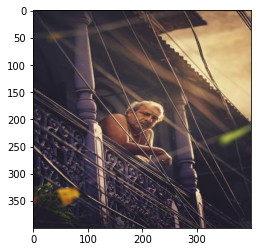

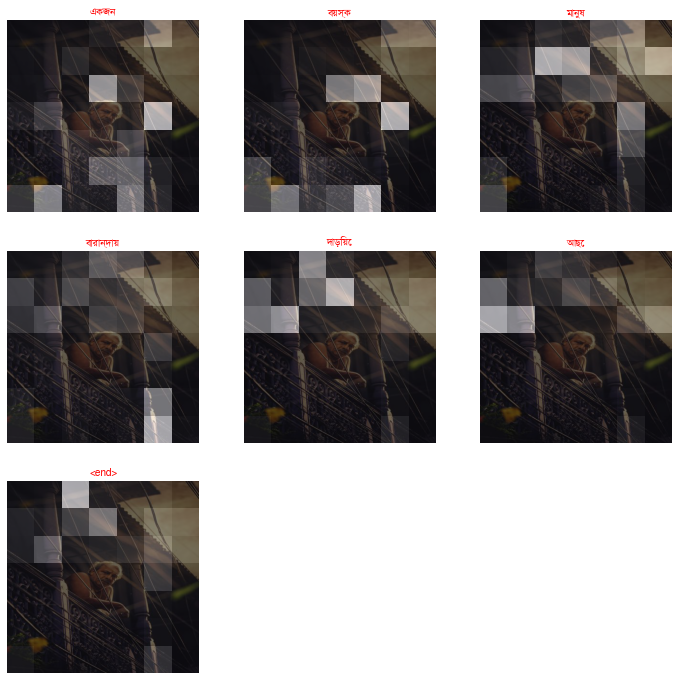

In [84]:
cap_test_data = caption_test.copy()
rid = np.random.randint(0, len(path_test))
test_image= path_test[rid]
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
result, attention_plot, pred_test = evaluate(test_image)
real_caption=filt_text(real_caption)      
pred_caption=' '.join(result).rsplit(' ', 1)[0]
real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()
temp_img = np.array(Image.open(test_image))
plt.imshow(temp_img)
smooth = SmoothingFunction().method4
bleu1 = sentence_bleu(reference, candidate, weights=(1.0, 0, 0, 0), smoothing_function=smooth)*100
bleu2 = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth)*100
bleu3 = sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.37, 0), smoothing_function=smooth)*100
bleu4 = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smooth)*100
print('BLEU-1: %f' % bleu1)
print('BLEU-2: %f' % bleu2)
print('BLEU-3: %f' % bleu3)
print('BLEU-4: %f' % bleu4)
score = meteor_score(reference,candidate)
print('Meteor Score: %f' % score)

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)

plot_attention_map(result, attention_plot, test_image)


In [ ]:

b1=[]
b2=[]
b3=[]
b4=[]
m_score=[]

for rid in range(0,len(path_test)):
  test_image= path_test[rid]
  real_caption = ' '.join([tokenizer.index_word[i] for i in caption_test[rid] if i not in [0]])
  result, attention_plot, pred_test = evaluate(test_image)
  real_caption=filt_text(real_caption)      
  pred_caption=' '.join(result).rsplit(' ', 1)[0]
  print(pred_caption)
  real_appn = []
  real_appn.append(real_caption.split())
  reference = real_appn
  candidate = pred_caption.split()
  smooth = SmoothingFunction().method4
  bleu1 = sentence_bleu(reference, candidate, weights=(1.0, 0, 0, 0), smoothing_function=smooth)*100
  bleu2 = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth)*100
  bleu3 = sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.37, 0), smoothing_function=smooth)*100
  bleu4 = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smooth)*100
  b1.append(bleu1)
  b2.append(bleu2)
  b3.append(bleu3)
  b4.append(bleu4)
  score = meteor_score(reference,candidate)
  m_score.append(score)

In [ ]:
print('BLEU-1: %f' % np.mean(b1))
print('BLEU-2: %f' % np.mean(b2))
print('BLEU-3: %f' % np.mean(b3))
print('BLEU-4: %f' % np.mean(b4))

In [ ]:
print('Meteor Score of Bahdanau attention: %f' % np.mean(m_score))

## Meteor Score

In [ ]:

test_image= '/content/drive/MyDrive/Thesis/Test Images/19.png'
result, attention_plot, pred_test = evaluate(test_image)     
pred_caption=' '.join(result).rsplit(' ', 1)[0]

print ('Prediction Caption:', pred_caption)
img,img_path = load_images(test_image)
#plt.imshow(img)

temp_img = np.array(Image.open(test_image))
plt.imshow(temp_img)

In [ ]:
test_image= '/content/drive/MyDrive/Thesis/Test Images/19.png'
result, attention_plot, pred_test = evaluate(test_image)     
pred_caption=' '.join(result).rsplit(' ', 1)[0]

print ('Prediction Caption:', pred_caption)
img,img_path = load_images(test_image)
plt.imshow(img)

In [ ]:
test_image= '/content/drive/MyDrive/Thesis/Test Images/42.png'
result, attention_plot, pred_test = evaluate(test_image)     
pred_caption=' '.join(result).rsplit(' ', 1)[0]
print ('Prediction Caption:', pred_caption)

temp_img = np.array(Image.open(test_image))
plt.imshow(temp_img)